# **MATH 1310 Final Project: Exploring Factors Influencing Loan Repayment**

## Authors: Samin Sharif, Arya Fadavi, Kensei N'toto, Muhammad Fahim

**Original Data Source: VENKATASUBRAMANIAN,SUNDARAMAHADEVAN. (2021). Credit EDA Case Study. https://www.kaggle.com/datasets/venkatasubramanian/credit-eda-case-study**

# Credit EDA Dataset Description

**Attributes for netflix_titles.csv dataset: [Important ones for our data analysis]**

1.CODE_GENDER: Gender of the client.

2.CNT_CHILDREN: Number of children the client has.

3.TARGET: Binary indicator of loan repayment difficulties (1 if difficulties, 0 otherwise).

4.AMT_CREDIT: Total credit amount requested by the client.

5.AMT_ANNUITY: Annuity of the loan.

6.AMT_INCOME_TOTAL: Total annual income of the client.

7.NAME_EDUCATION_TYPE: Level of education of the client.

8.DAYS_BIRTH: Age of the client in days (negative value representing days since birth).

9.WEEKDAY_APPR_PROCESS_START: Day of the week when the loan application process started.

10.HOUR_APPR_PROCESS_START: Hour of the day when the loan application process started.

# 1- Frame the problem

### Introduction and goal of the problem

The objective of this final project is to gain an understanding of the factors contributing to the inability to repay loans. We aim to dissect and frame the nature of these factors by exploring various financial and demographic connections through the creation of Exploratory Data Analysis (EDA). The primary goal is to uncover patterns, and trends within the dataset, in order to uncover critical features that play a significant role in predicting challenges associated with loan repayment.


# 2- Load the dataset

In [1]:
# Importing the libraries
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as smf
import statsmodels.api         as sm
import scipy

# %matplotlib inline
# plt.style.use('ggplot')
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

In [2]:
app_df= pd.read_csv("application_data.csv") # Read dataset from the CSV file into a DataFrame

In [3]:
app_df.head() # Use head() to look at the first 5 rows

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_df.describe() # Use describe() method to see a summary of the numerical attributes

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
app_df.info() # Use info() to get a quick information from the data like columns, rows, and datatypes etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
app_df.shape # Check the shape of the df

(307511, 122)

# 3- Data Cleaning and Preprocessing

In [7]:
# Check for null values
null_values = app_df.isnull().sum()
print(null_values)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [8]:
# Drop all null valuesx
app_df = app_df.fillna(0)
print(app_df.isnull().sum())

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64


In our data preprocessing, we chose to fill missing numerical values in the dataset with zero instead of dropping them. Imputing arbitrary numerical values could introduce biases, affecting the validity of our analysis. We initially assessed missing values using app_df.isnull().sum(), identified varying counts of nulls, and then filled all null values with 0 with app_df.dropna(). This ensures a clean dataset, free of missing numerical values, enhancing the reliability of our analysis.

In [9]:
ontime_df = app_df[app_df['TARGET'] == 0]
late_df = app_df[app_df['TARGET'] == 1]

#splits the DF into late and timely payments 


The original DataFrame was divided into two subsets—ontime_df and late_df—based on the 'TARGET' column. This division proves beneficial for focused analyse. By isolating instances of timely and late payments, the approach enables a targeted exploration of distinct characteristics, aiding in the identification of patterns associated with successful loan repayments or challenges.

In [10]:
# We drop the Flag attributes and create new dataframes with the necessary variables we need
selected_columns = [
    'CODE_GENDER', 'CNT_CHILDREN', 'TARGET', 'AMT_CREDIT',
    'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH',
    'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'
]

ontime_df = ontime_df[selected_columns]
late_df= late_df[selected_columns]
late_df

,CODE_GENDER,CNT_CHILDREN,TARGET,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
0,M,0,1,406597.5,24700.5,202500.0,Secondary / secondary special,-9461,WEDNESDAY,10
26,F,0,1,979992.0,27076.5,112500.0,Secondary / secondary special,-18724,MONDAY,9
40,M,0,1,1193580.0,35028.0,202500.0,Secondary / secondary special,-17482,TUESDAY,9
42,F,0,1,288873.0,16258.5,135000.0,Secondary / secondary special,-13384,THURSDAY,11
81,F,0,1,252000.0,14593.5,81000.0,Secondary / secondary special,-24794,THURSDAY,10
...,...,...,...,...,...,...,...,...,...,...
307448,M,1,1,450000.0,32746.5,207000.0,Secondary / secondary special,-9918,MONDAY,16
307475,F,1,1,1303200.0,46809.0,144000.0,Higher education,-13416,THURSDAY,13
307481,M,0,1,297000.0,19975.5,225000.0,Secondary / secondary special,-20644,FRIDAY,15
307489,F,0,1,521280.0,23089.5,225000.0,Secondary / secondary special,-16471,FRIDAY,5


In the transformation process, we changed the original DataFrame by excluding the 'FLAG' attributes, resulting in a more focused dataset. The refined DataFrames, ontime_df and late_df, now exclusively include essential variables related to gender, number of children, loan repayment status (TARGET), credit amount (AMT_CREDIT), annuity amount (AMT_ANNUITY), total income (AMT_INCOME_TOTAL), education type (NAME_EDUCATION_TYPE), age in years (DAYS_BIRTH), weekday of application processing (WEEKDAY_APPR_PROCESS_START), and hour of application processing (HOUR_APPR_PROCESS_START). This targeted extraction enhances clarity and efficiency for subsequent analyses, allowing for a more precise exploration of factors influencing timely and late loan repayments.

In [11]:
#Turn DAYS_BIRTH into a year instead of negative number
late_df['DAYS_BIRTH'] = ((late_df['DAYS_BIRTH'] / 365) * -1).astype(int)
ontime_df['DAYS_BIRTH'] = ((ontime_df['DAYS_BIRTH'] / 365) * -1).astype(int)
ontime_df

,CODE_GENDER,CNT_CHILDREN,TARGET,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
1,F,0,0,1293502.5,35698.5,270000.0,Higher education,45,MONDAY,11
2,M,0,0,135000.0,6750.0,67500.0,Secondary / secondary special,52,MONDAY,9
3,F,0,0,312682.5,29686.5,135000.0,Secondary / secondary special,52,WEDNESDAY,17
4,M,0,0,513000.0,21865.5,121500.0,Secondary / secondary special,54,THURSDAY,11
5,M,0,0,490495.5,27517.5,99000.0,Secondary / secondary special,46,WEDNESDAY,16
...,...,...,...,...,...,...,...,...,...,...
307505,F,0,0,225000.0,22050.0,112500.0,Secondary / secondary special,66,MONDAY,15
307506,M,0,0,254700.0,27558.0,157500.0,Secondary / secondary special,25,THURSDAY,15
307507,F,0,0,269550.0,12001.5,72000.0,Secondary / secondary special,56,MONDAY,8
307508,F,0,0,677664.0,29979.0,153000.0,Higher education,41,THURSDAY,9


The variable "DAYS_BIRTH" was initially represented as a negative number, which could be challenging to understand easier and use it for analysis, the variable was transformed into a more intuitive form by dividing it by 365 and converting it into an integer. This transformation effectively expresses the age of the individual in years, providing a more straightforward and positive numerical representation for analytical purposes

With the completion of the date cleaning process, the dataset is now free of null values, and all columns are in a cleaned and comprehensible format. This lays a solid foundation for the now EDA phase, where these columns will be used to extract meaningful information about the dataset. The cleaned data enables us to find more accurate and insightful exploration of patterns, relationships, and trends

# 4- Exploratory Data Analysis and Hypothesis Testing

## 1 - the relationship between number of children and loan repayment difficulties

In [12]:
from scipy import stats #import stats from scipy

In [13]:
np.corrcoef(app_df['TARGET'],app_df['CNT_CHILDREN'])[0,1] #check for correlation coefficient

0.019187133596270018

This is the correlation coefficient between the 'TARGET' variable, indicating loan repayment difficulties, and the 'CNT_CHILDREN' variable, representing the number of children a client has. The resulting value, being close to zero, indicates a weak positive correlation. This suggests that, on average, clients with a higher number of children may exhibit a slightly elevated probability of facing challenges in loan repayment. The positive correlation implies a tendency for an increase in the number of children to be associated with a slightly higher likelihood of payment difficulties. 

In [14]:
on_time_ttest=ontime_df.CNT_CHILDREN #do hypothesis testing
late_ttest=late_df.CNT_CHILDREN

statistic, pvalue = stats.ttest_ind(on_time_ttest,late_ttest, equal_var=False)
statistic, pvalue

(-10.191428932864952, 2.3811458429026633e-24)

H0:μ on-time = μ late </br>
H1: μ on-time ≠ μ late

The null hypothesis (H0) in this t-test is that the mean number of children ('CNT_CHILDREN') is the same for both on-time and late repayment groups. The rejection of the null hypothesis (H1), supported by the very small p-value, indicates strong evidence that the means of the two groups are significantly different.
 
 
Since the p-value is very close to zero (much smaller than the significance level of 0.05), you would reject the null hypothesis. The negative sign of the test statistic suggests that the mean of the 'CNT_CHILDREN' variable in the two groups (on-time and late) is significantly different.
The extremely small p-value indicates strong evidence against the null hypothesis, suggesting that the observed difference in means is unlikely to be due to random chance.
In summary, the results of the t-test suggest that there is a significant difference in the means of 'CNT_CHILDREN' between the on-time and late groups and that the number of children is a relevant factor influencing repayment patterns. 







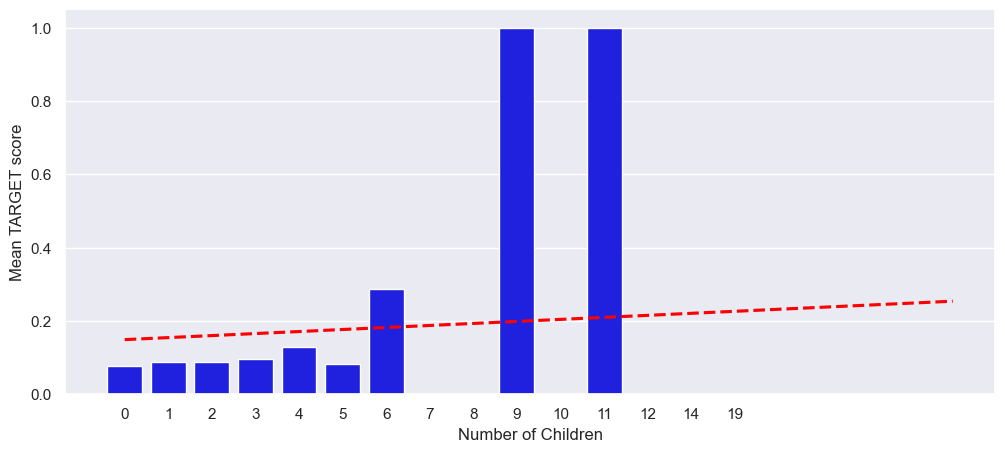

In [15]:
target_mean = app_df.groupby(by="CNT_CHILDREN").TARGET.mean() #visualize graph
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")
sns.barplot(x= target_mean.index, y = target_mean.values, color = 'blue')
sns.regplot(x=target_mean.index, y=target_mean.values, scatter = False, color="red", ci=None, line_kws={"linestyle": "--"})


plt.ylabel("Mean TARGET score")
plt.xlabel("Number of Children")
plt.show()

The closer the mean TARGET score is to 1, the more clients with that number of children have confronted difficulties when repaying their loans. After 6 children, the means are either 0 or 1. This is due to the fact that the number of values drops significantly because having more than 6 kids is highly irregular. Thus, for the scope of this study their means are not particularily relevant to our analysis.


We see that as the number of children increases, the TARGET score means are also increasing suggesting that the regression line supports our findings in the correlation coefficient that there exists a weak but positive correlation between the number of children and the inability to repay loans.

## 2 - the relationship between target score and hour the application was processed

In [16]:
np.corrcoef(app_df['TARGET'],app_df['HOUR_APPR_PROCESS_START'])[0,1]

-0.02416583143009441

The correlation coefficient between the 'TARGET' variable (indicating loan repayment difficulties) and the 'HOUR_APPR_PROCESS_START' variable (representing the hour when the loan application process begins). The resulting value, being weak and negative, suggests a subtle correlation. Specifically, as the hour of the day when the application is initiated becomes later, there is a slight tendency for clients to be more likely to repay the loan on time.

In [17]:
on_time_ttest=ontime_df.HOUR_APPR_PROCESS_START
late_ttest=late_df.HOUR_APPR_PROCESS_START

statistic, pvalue = stats.ttest_ind(on_time_ttest,late_ttest, equal_var=False)
statistic, pvalue

# same as with the children, supports there is a significicant difference since p<0.05

(13.332374480762848, 1.9686077424188985e-40)

The obtained p-value is much smaller than 0.05. Therefore, you would reject the null hypothesis. This rejection, supported by the large and positive test statistic value, provides strong evidence that the mean hours of loan application processing differ significantly between on-time and late repayment groups. The negative sign of the test statistic indicates the direction of the difference, suggesting a substantial variation in the processing hours for these two repayment categories. In summary, the results of the t-test suggest that the timing of loan application processing is a relevant factor influencing repayment patterns, with a significant difference observed between on-time and late repayment groups.

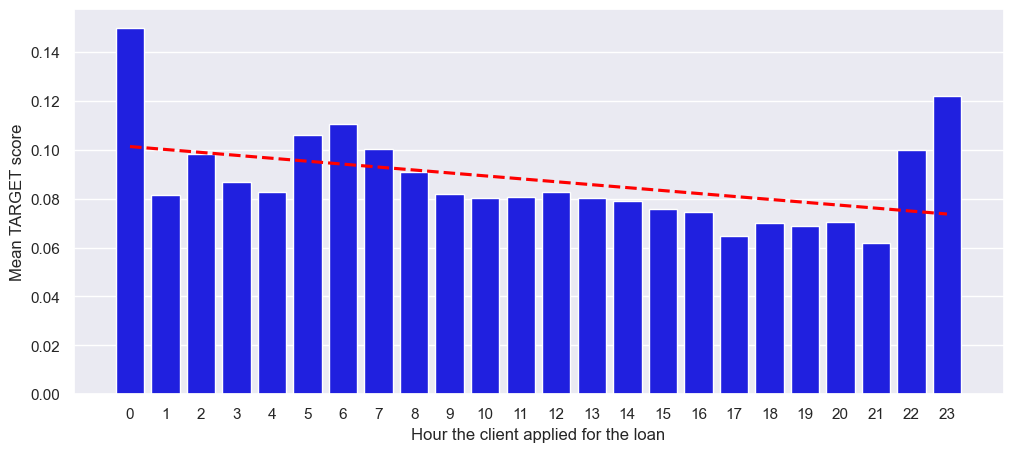

In [18]:
target_mean = app_df.groupby(by="HOUR_APPR_PROCESS_START").TARGET.mean()
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")
sns.barplot(x= target_mean.index, y = target_mean.values, color = 'blue')
sns.regplot(x=target_mean.index, y=target_mean.values, scatter = False, color="red", ci=None, line_kws={"linestyle": "--"})


plt.ylabel("Mean TARGET score")
plt.xlabel("Hour the client applied for the loan")
plt.show()

individuals who initiate loan applications at 11pm or midnight exhibit a higher average TARGET score. This could be attributed to the possibility that those commencing applications late are motivated by a desire to meet a deadline, perhaps indicating procrastination until the last minute. Such behavioral tendencies might extend to loan repayment, potentially increasing the likelihood of late repayments. The observed correlation between the initiation hour and the higher average TARGET score suggests a connection between the timing of application submissions and subsequent repayment behavior, reflecting the influence of time-related pressures on financial decisions.

## 3 - the relationship between occupation and loan credit repayment

In [19]:
app_df['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 0, 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

These are the different types of occupations that are in the dataframe

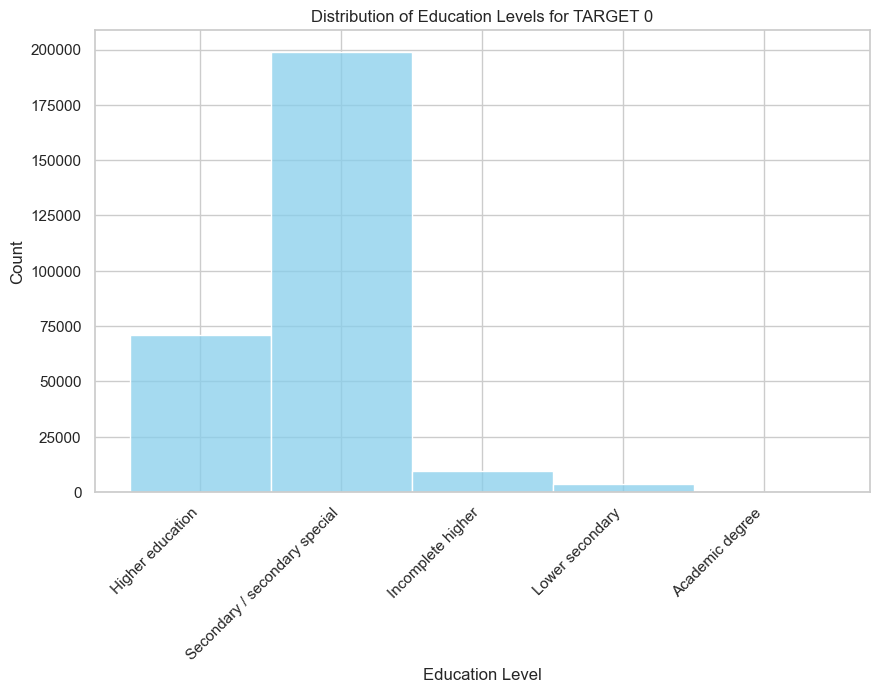

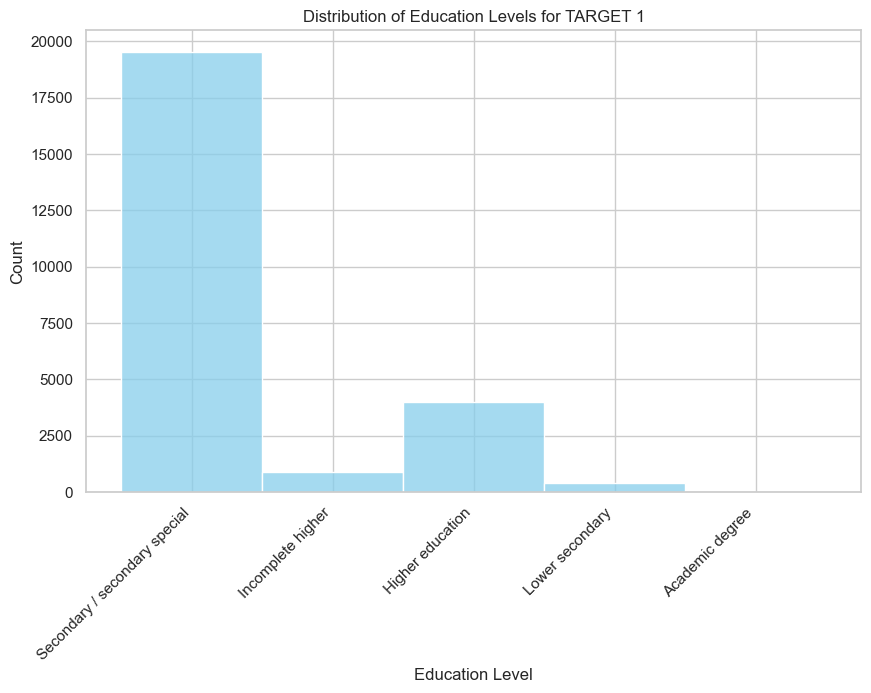

In [20]:
sns.set(style="whitegrid")
e_order = ontime_df['NAME_EDUCATION_TYPE'].unique()



plt.figure(figsize=(10, 6))
sns.histplot(data=ontime_df, x='NAME_EDUCATION_TYPE', bins=len(ontime_df['NAME_EDUCATION_TYPE'].unique()), kde=False, color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels for TARGET 0')

plt.xticks(rotation=45, ha='right')

plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=late_df, x='NAME_EDUCATION_TYPE', bins=len(late_df['NAME_EDUCATION_TYPE'].unique()), kde=False, color='skyblue' )
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels for TARGET 1')

plt.xticks(rotation=45, ha='right')

plt.show()


These graphs are used to show the education levels within the datasets late_df and ontime_df. Both datasets exhibit very similar distributions in terms of education levels.The only noteworthy difference emerges in the composition of Target 0 (individuals repaying loans successfully), which demonstrates a higher proportion of individuals with 'Higher education' compared to Target 1 (individuals facing challenges in loan repayment). While this observation doesn't conclusively establish education as a definitive factor influencing repayment difficulties, it underscores the importance of considering education as a potential variable when exploring factors impacting loan repayment challenges.

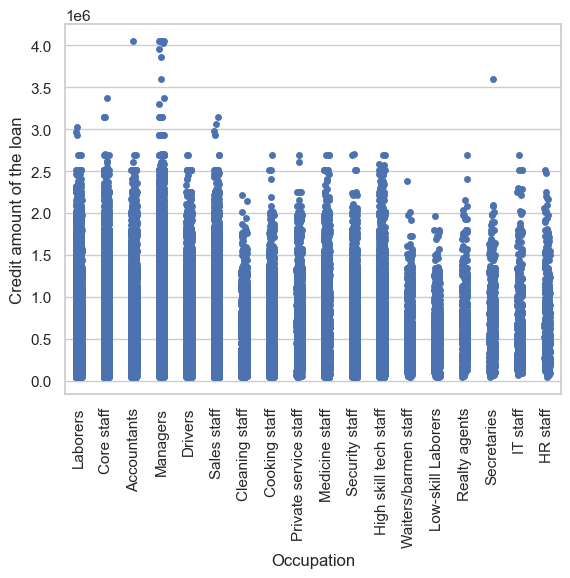

In [21]:
app_df = app_df[app_df['OCCUPATION_TYPE'].astype(str).str.strip() != '0']

# Create the strip plot
ax = sns.stripplot(x="OCCUPATION_TYPE", y="AMT_CREDIT", data=app_df)
plt.xlabel('Occupation')
plt.ylabel('Credit amount of the loan')
plt.xticks(rotation=90)
plt.show()

This visualization illustrates the density of credit loan amounts across various occupations, highlighting where most data points are concentrated. The visualization captures the specific credit value ranges for each occupation and the presence of outliers, providing a view of the distribution of credit amounts across different careers. This is useful as it lets us know which types of occupations are most likely to have the highest amount of loan

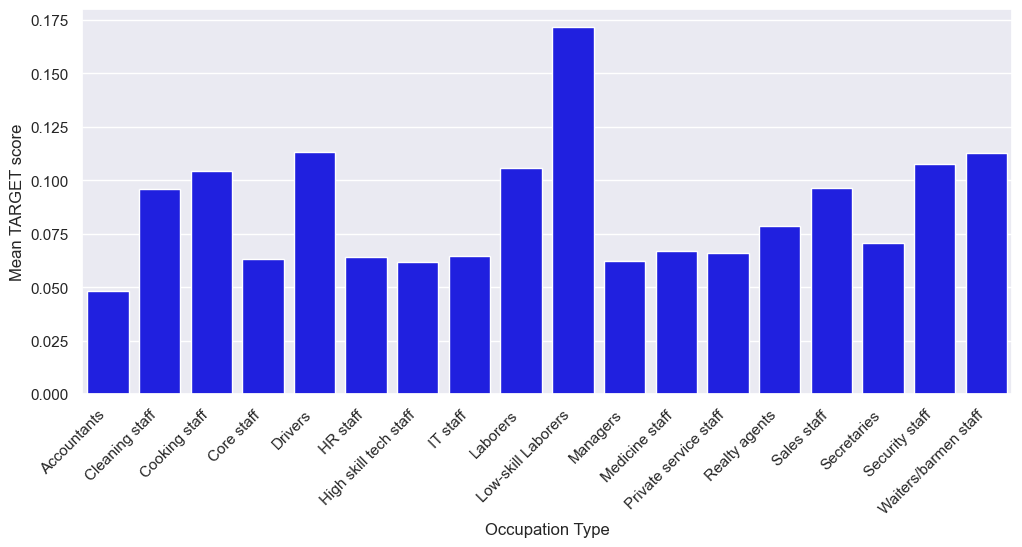

In [22]:
target_mean = app_df.groupby(by="OCCUPATION_TYPE").TARGET.mean()
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")
sns.barplot(x= target_mean.index, y = target_mean.values, color = 'blue')
plt.xticks(rotation=45, ha='right')


plt.ylabel("Mean TARGET score")
plt.xlabel("Occupation Type")
plt.show()

The graph shows the average TARGET score (how likely they are to pay the loan) across various occupation types. Each bar in the plot corresponds to a specific occupation type. A higher bar indicates a higher average level of loan repayment challenges for that occupation, while a lower bar suggests a lower average level of challenges. Low-skill labourers are most susceptible to not being able to pay the loan.

## 4 - the relationship between loan proportion and repayment

In [23]:
ontime_df['proportion'] = ontime_df['AMT_CREDIT'] / ontime_df['AMT_INCOME_TOTAL']
late_df['proportion'] = late_df['AMT_CREDIT'] / late_df['AMT_INCOME_TOTAL']

average_proportion_on_time = ontime_df['proportion'].mean()
average_proportion_late = late_df['proportion'].mean()

print("Average Proportion (On Time Payment):", average_proportion_on_time)
print("Average Proportion (Late Payment):", average_proportion_late)

statistic, pvalue = stats.ttest_ind(ontime_df['proportion'], late_df['proportion'], equal_var=False)
print("T-test Statistic:", statistic)
print("P-value:", pvalue)

if pvalue < 0.05:
    print("There is a significant difference in the proportion of income represented by the loan between on-time and late payments.")
else:
    print("There is no significant difference in the proportion of income represented by the loan between on-time and late payments.")


Average Proportion (On Time Payment): 3.963729088910814
Average Proportion (Late Payment): 3.887438479317676
T-test Statistic: 4.377303640868856
P-value: 1.2056779970047675e-05
There is a significant difference in the proportion of income represented by the loan between on-time and late payments.


Null Hypothesis (H0):
There is no significant difference in the proportion of income represented by the loan between clients who made on-time payments and those who had difficulties repaying the loan.


Alternative Hypothesis (H1):
There is a significant difference in the proportion of income represented by the loan between clients who made on-time payments and those who had difficulties repaying the loan.

H0: μ On Time = μ Late
Ha: μ On Time ≠ μ Late

The small p-value from your t-test supports the rejection of the null hypothesis, providing evidence in favor of the alternative hypothesis that there is a significant difference in the proportion of income represented by the loan between the two groups.

Average Proportion:

Clients who made on-time payments have an average proportion of approximately 3.96, indicating that, on average, their loan amounts are about 3.96 times their annual income.
Clients who had difficulties repaying the loan have a slightly lower average proportion of approximately 3.89, indicating that, on average, their loan amounts are about 3.89 times their annual income.

P-value:

The p-value is very small (1.21e-05 or 0.000012).
The p-value is the probability of observing a t-statistic as extreme as the one computed, assuming that the null hypothesis is true (i.e., assuming there is no difference between the groups).
A small p-value (typically below a chosen significance level, e.g., 0.05) indicates that you can reject the null hypothesis.

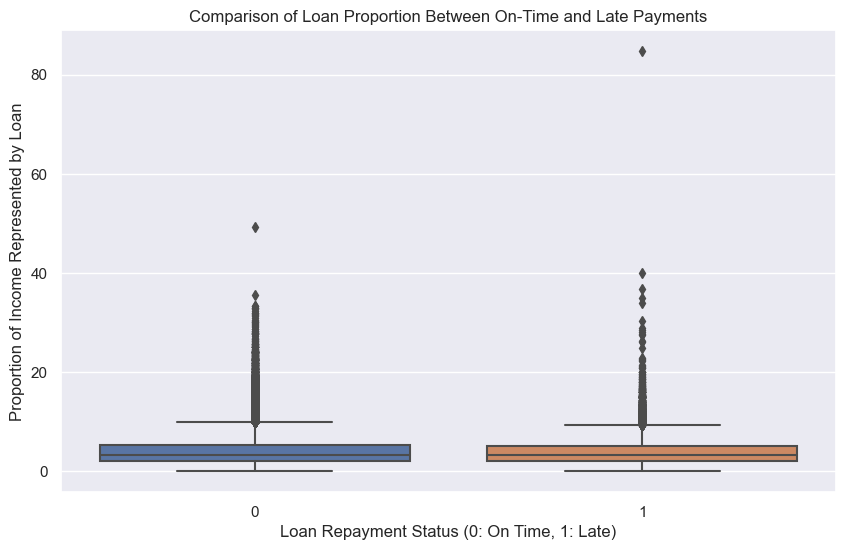

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data from both dataframes
combined_data = pd.concat([ontime_df[['proportion', 'TARGET']], late_df[['proportion', 'TARGET']]])

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='proportion', data=combined_data)
plt.xlabel('Loan Repayment Status (0: On Time, 1: Late)')
plt.ylabel('Proportion of Income Represented by Loan')
plt.title('Comparison of Loan Proportion Between On-Time and Late Payments')
plt.show()


Therefore, there is strong evidence to suggest that there is a significant difference in the proportion of income represented by the loan between clients who made on-time payments and those who had difficulties repaying the loan.
In practical terms, this may suggest that clients who had difficulties repaying the loan tended to take out loans that constituted a larger proportion of their income compared to clients who made on-time payments.

## 5 - the relationship between age and loan repayment

In [25]:
# convert age to years
ontime_df['age'] = ontime_df['DAYS_BIRTH']
late_df['age'] = late_df['DAYS_BIRTH']

#the average age for each group
average_age_ontime = ontime_df['age'].mean()
average_age_late = late_df['age'].mean()

# average ages
print("Average age (On Time Payment):", average_age_ontime)
print("Average age (Late Payment):", average_age_late)

#T-test
statistic, pvalue = stats.ttest_ind(ontime_df['age'], late_df['age'], equal_var=False)
print("T-test Statistic:", statistic)
print("P-value:", pvalue)


if pvalue < 0.05:
    print("There is a significant difference between the age of on-time and late payment clients.")
else:
    print("There is no significant difference between the age of on-time and late payment clients.")

Average age (On Time Payment): 43.713123394862144
Average age (Late Payment): 40.279959718026184
T-test Statistic: 45.00787972577651
P-value: 0.0
There is a significant difference between the age of on-time and late payment clients.


Average Ages:

Average age for clients with on-time payments: 43.71 years

Average age for clients with late payments: 40.28 years

T-test Results:

T-test Statistic: 45.01 P-value: 0.0

(null hypothesis) H0 :There is no significant difference in the average age between clients with on-time payments and those with late payments. (alternative hypothesis) Ha:There is a significant difference in the average age between clients with on-time payments and those with late payments.

H0: μ On Time = μ Late Ha: μ On Time ≠ μ Late

Interpretation: The t-test statistic measures the difference in average age between the two groups relative to the variability within each group. The p-value is the probability of observing a t-statistic as extreme as the one computed, assuming that the null hypothesis (no difference in average age) is true.

Conclusion: The extremely small p-value (practically zero) suggests that there is a statistically significant difference in the average age between clients with on-time payments and those with late payments. With such a low p-value, you would reject the null hypothesis that there is no difference in average age between the two groups.

In [26]:
mean_ontime = ontime_df['age'].mean()
mean_late = late_df['age'].mean()

std_ontime = ontime_df['age'].std()
std_late = late_df['age'].std()

n_ontime = len(ontime_df)
n_late = len(late_df)

pooled_std = np.sqrt(((n_ontime - 1) * std_ontime**2 + (n_late - 1) * std_late**2) / (n_ontime + n_late - 2))
cohen_d = (mean_ontime - mean_late) / pooled_std

print("Cohen's d:", cohen_d)


Cohen's d: 0.288066106811713


A Cohen's d value of 0.288 suggests a small to medium effect size. In the context of comparing the age difference between on-time and late payment groups, this indicates that there is a noticeable difference in the means of the two groups, but the effect is not extremely large. Cohen's D speaks to the real world significance of the difference.

Interpretation of Cohen's d values:

Small effect: ∣d∣≤0.2
Medium effect: 0.2<∣d∣≤0.5
Large effect: ∣d∣>0.5
So, in your case, the age difference between on-time and late payment clients has a small to medium effect size.

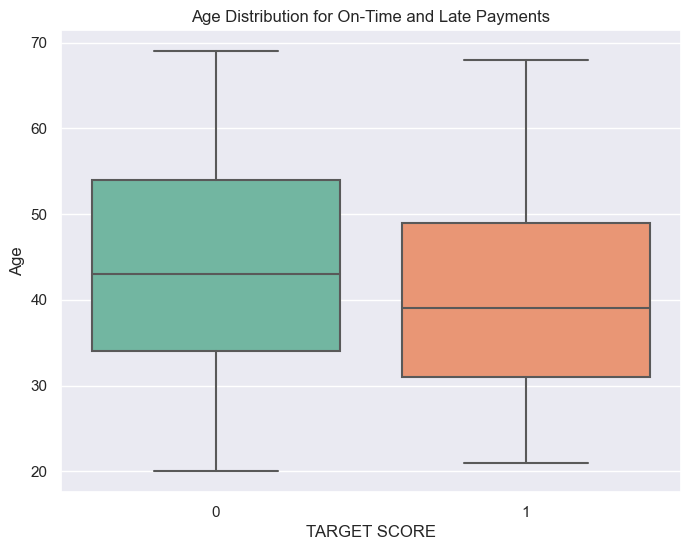

In [27]:
combined_age_data = pd.concat([ontime_df[['age', 'TARGET']], late_df[['age', 'TARGET']]])


plt.figure(figsize=(8, 6))
sns.boxplot(x='TARGET', y='age', data=combined_age_data, palette='Set2')
plt.title('Age Distribution for On-Time and Late Payments')
plt.xlabel('TARGET SCORE')
plt.ylabel('Age')
plt.show()

<Figure size 1200x600 with 0 Axes>

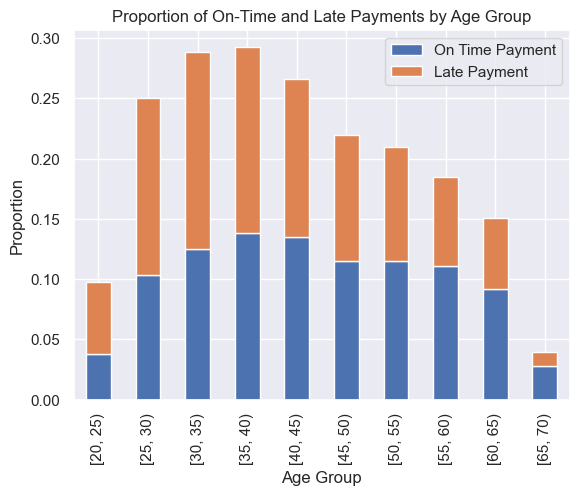

In [28]:
# age groups of 5 years
age_bins = np.arange(20, 75, 5)
ontime_df['age_group'] = pd.cut(ontime_df['age'], bins=age_bins, right=False)
late_df['age_group'] = pd.cut(late_df['age'], bins=age_bins, right=False)

# calculate proportions of ontime and late clients in each group
ontime_age_proportions = ontime_df['age_group'].value_counts(normalize=True).sort_index()
late_age_proportions = late_df['age_group'].value_counts(normalize=True).sort_index()

# combine into one dataframe
age_proportions_df = pd.DataFrame({'On Time Payment': ontime_age_proportions,'Late Payment': late_age_proportions})


plt.figure(figsize=(12, 6))
age_proportions_df.plot(kind='bar', stacked=True)
plt.title('Proportion of On-Time and Late Payments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.show()

Graph displaying both the on time and late dataframes with their correspoding age groups compared with the proportion. As can be seen the late payment group has a lot more on the higher side of the prop

In [29]:
summary_stats = combined_age_data.groupby('TARGET')['age'].describe()
print(summary_stats)

           count       mean        std   min   25%   50%   75%   max
TARGET                                                              
0       282686.0  43.713123  11.955290  20.0  34.0  43.0  54.0  69.0
1        24825.0  40.279960  11.484458  21.0  31.0  39.0  49.0  68.0


The results indicate that age may be a small factor associated with loan repayment behavior. The average age difference between the two groups suggests that, on average, clients with late payments tend to be younger than those with on-time payments.

## 6 - the relationship between the amount of credit and loan repayment
- first show that there is no significant relationship between credit amount and average target score
- second, show which variables have a relationship with credit amount 

In [30]:
numeric_columns = ['CNT_CHILDREN', 'TARGET', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'HOUR_APPR_PROCESS_START', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']

corr_mat = app_df[numeric_columns].corr()

As a business, our client should try to maximize their profits. Initially, it would be logical to assume that granting loans with a higher credit will result in a greater return, however, if those clients fail to repay then the risk is also greater. It could be beneficial to offer smaller, lower risk loans if the data suggests that clients who receive a lower credit amountloan are more likely to pay back. The company has a set amount of capital it can loan out, thus this part of the exploration will aim to determine how they should invest their capital. 

Should the company focus more on making multiple smaller loans or fewer larger loans? 

If no significant relationship exists, our client should then aim to provide larger credit amount loans to gain a larger return. 



In [31]:
correlation_coefficient = np.corrcoef(app_df['TARGET'],app_df['AMT_CREDIT'])[0,1]
print('correlation coefficient:', correlation_coefficient)

median = app_df['AMT_CREDIT'].quantile()
print('median:', median)
small_loan = app_df[app_df['AMT_CREDIT'] < 513531]
large_loan = app_df[app_df['AMT_CREDIT'] > 513531]


small_ttest=small_loan.AMT_CREDIT
large_ttest=large_loan.AMT_CREDIT
statistic, pvalue = stats.ttest_ind(small_ttest,large_ttest, equal_var=False)
print('T-stat', statistic, 'P-value', pvalue)


mean_difference = large_loan['TARGET'].mean() - small_loan['TARGET'].mean()
pooled_std = np.sqrt((large_loan['TARGET'].std()**2 + small_loan['TARGET'].std()**2) / 2)
cohen_d = mean_difference / pooled_std

print("Cohen's d:", cohen_d)


print("  ")
print("  ")


X = sm.add_constant(app_df['AMT_CREDIT'])
y = app_df['TARGET']

model = sm.OLS(y, X).fit()
print(model.summary())




correlation coefficient: -0.040778767263310714
median: 521280.0
T-stat -545.9174949586537 P-value 0.0
Cohen's d: -0.04384758345308535
  
  
                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     351.7
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           2.14e-78
Time:                        20:45:25   Log-Likelihood:                -32950.
No. Observations:              211120   AIC:                         6.590e+04
Df Residuals:                  211118   BIC:                         6.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

The OLS Regression Results: the low R-suared and coefficient magnitude suggest a very weak linear relationship between the credit amount of the loan and the target score.


The correlation coefficient: implies weak negative correlation between the target score and the amount of credit


T-test Results:
T-statistic: the t-statistic is quite large (negative), indicating a significant difference between the means of small and large loans.

P-value: The p-value is very close to zero (P-value: 0.0) indicating that the difference in means is statistically significant.

However, Cohen's d:
Cohen's d is a measure of the effect size, representing the standardized difference between two means. In your case, Cohen's d is calculated as approximately -0.027, which is a small effect size.

Conclusion:
While the effect size is statistically significant due to the large sample size, it's important to note that the practical significance (effect size) is small. 
In summary, your analysis indicates a small difference in the mean target score between clients with small and large loans. This implies that, on average, clients with large loans may have a slightly lower likelihood of repaying their loans on time compared to those with small loans. 



Quantile: 0 - 0.1
Number of observations: 21934
Mean TARGET score: 0.07554481626698277

Quantile: 0.1 - 0.2
Number of observations: 20332
Mean TARGET score: 0.08975998426126304

Quantile: 0.2 - 0.3
Number of observations: 22274
Mean TARGET score: 0.09437011762593157

Quantile: 0.3 - 0.4
Number of observations: 26475
Mean TARGET score: 0.11252124645892352

Quantile: 0.4 - 0.5
Number of observations: 15716
Mean TARGET score: 0.10505217612624078

Quantile: 0.5 - 0.6
Number of observations: 20541
Mean TARGET score: 0.10856336108271263

Quantile: 0.6 - 0.7
Number of observations: 20652
Mean TARGET score: 0.09267867518884369

Quantile: 0.7 - 0.8
Number of observations: 21260
Mean TARGET score: 0.07304797742238947

Quantile: 0.8 - 0.9
Number of observations: 20880
Mean TARGET score: 0.0706896551724138

Quantile: 0.9 - 1
Number of observations: 21056
Mean TARGET score: 0.055091185410334344



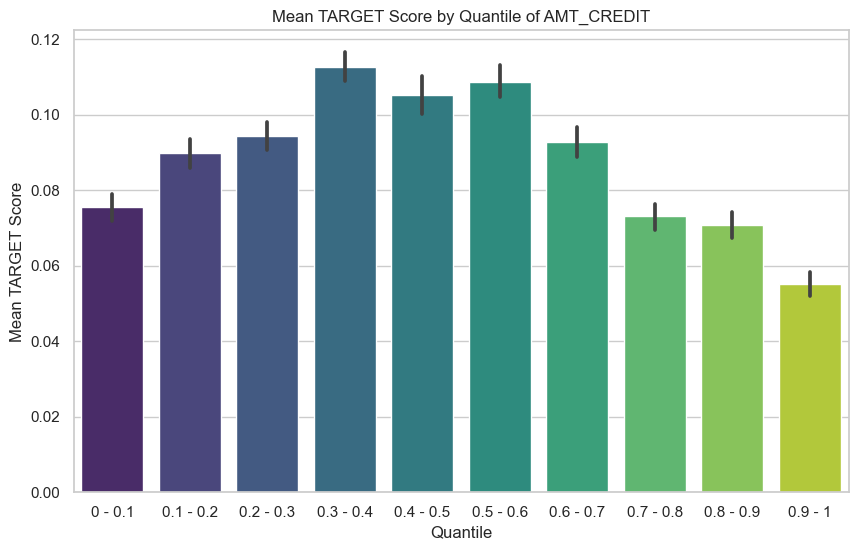

In [32]:
quantile = ['0 - 0.1', '0.1 - 0.2', '0.2 - 0.3', '0.3 - 0.4', '0.4 - 0.5', '0.5 - 0.6', '0.6 - 0.7', '0.7 - 0.8', '0.8 - 0.9', '0.9 - 1']

app_df['quantile'] = pd.qcut(app_df['AMT_CREDIT'], q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=quantile)

quantile_groups = app_df.groupby('quantile')

for name, group in quantile_groups:
    print(f"Quantile: {name}")
    print(f"Number of observations: {len(group)}")
    print(f"Mean TARGET score: {group['TARGET'].mean()}\n")

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='quantile', y='TARGET', data=app_df, palette='viridis')
plt.xlabel('Quantile')
plt.ylabel('Mean TARGET Score')
plt.title('Mean TARGET Score by Quantile of AMT_CREDIT')
plt.show()

Since we can observe a normal distribution on the graph (not one that trends upwards or downwards) and our statistical analysis revealed weak linear and practical signficance, it is safe to assume going forward that the credit amount doesn't sufficiently impact the TARGET score. Thus, the client should attempt to sell higher credit loans to maximize profits.  

# 5- CONCLUSION:

Therefore, after conducting Exploratory Data Analysis on various indicators and columns, several key factors influencing the inability to repay loans have been identified.


**In conclusion, our data analysis pinpointed critical factors influencing loan repayment. The number of children of the borrower, timing of applications, the borrower's occupation, the amount of loan that needs to be paid back, the borrower's age and the amount of credit returned by the borrower.**